<a href="https://colab.research.google.com/github/cs-victorious/-AIMl-Hackathon-2022/blob/master/Heart_Disease_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget -P /content/drive/MyDrive/hackathon https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data

--2022-05-29 05:27:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [application/x-httpd-php]
Saving to: ‘/content/drive/MyDrive/hackathon/processed.va.data’

processed.va.data   100%[===================>]   6.58K  --.-KB/s    in 0s      

2022-05-29 05:27:56 (95.0 MB/s) - ‘/content/drive/MyDrive/hackathon/processed.va.data’ saved [6737/6737]



In [17]:
!wget -P /content/drive/MyDrive/hackathon https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2022-05-29 05:34:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘/content/drive/MyDrive/hackathon/processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.1s    

2022-05-29 05:34:16 (136 KB/s) - ‘/content/drive/MyDrive/hackathon/processed.cleveland.data’ saved [18461/18461]



EDA on Heart Disease Dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("/content/drive/MyDrive/hackathon/processed.cleveland.data")
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [21]:
#reading the datset
df = pd.read_csv("/content/drive/MyDrive/hackathon/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#get the shape of data
df.shape

(303, 14)

In [27]:
#get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
#get the discription of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
#check the patients having disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

165 are heart patients
138 are non heart disease patients 

In [36]:
#check the gender of patients having disease
df['sex'].value_counts()
sex = df['sex']

207 male patients and 96 female patients

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


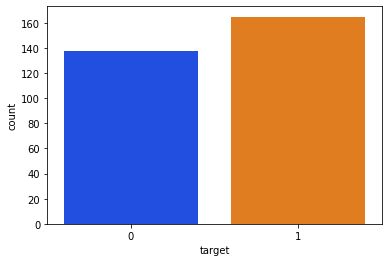

In [45]:

# plotting the target attribute target vs count
sns.countplot(df['target'], palette = 'bright')

Text(0.5, 1.0, 'Relationship of tresbps with genders to target')

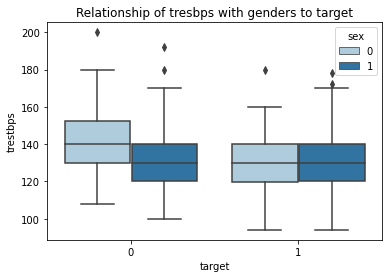

In [50]:
# multi-variate analysis (resting blood pressure (in mm Hg on admission to the hospital)
sns.boxplot(x = df['target'], y = df['trestbps'], hue = df['sex'], palette = 'Paired')
plt.title('Relationship of tresbps with genders to target', fontsize = 12)

Creating Model

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
#divide the data to target and features
X = df.drop(['target'], axis=1)
y = df.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [53]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [59]:
#Cretae Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression(random_state = 1)
lrg.fit(X_train,y_train )
print("Training Accuracy :", lrg.score(X_train, y_train))
print("Testing Accuracy :", lrg.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
#Predict  the test data 
y_pred_lrg = lrg.predict(X_test)

In [57]:
#checking the performance of the model for first 10 values
y_pred_lrgdf = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_lrg })
y_pred_lrgdf.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
lrg_cm = confusion_matrix(y_test, y_pred_lrg)
lrg_cm

array([[30,  0],
       [ 0, 31]])

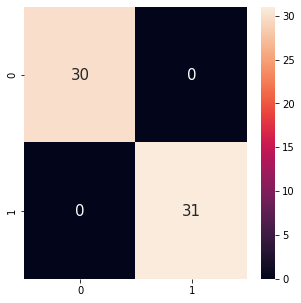

In [63]:
#plotting confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(lrg_cm, annot = True, annot_kws = {'size':15})
